### Comprehensive Data Analysis and Machine Learning Pipeline

### Objective
To integrate and apply advanced data analysis and machine learning techniques on a publicly available dataset from the UCI Machine Learning Repository, demonstrating an in-depth understanding of the data science workflow.

### Part 1: Dataset Selection and Loading

We'll use the **`Heart Disease Dataset`** from UCI, a multi-feature dataset that is often used to classify the presence of heart disease.

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, header=None, names=columns)

# Check dataset structure
print("Data Shape:", data.shape)
print(data.info())
data.head()

Data Shape: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Part 2: Data Preprocessing

1. **Cleaning**: Handle missing values, duplicates, and outliers.
2. **Encoding**: Convert categorical data into numerical using one-hot encoding.
3. **Normalizing and Scaling**: Scale numerical features for improved model performance.
4. **Balancing**: Address class imbalance using SMOTE (Synthetic Minority Over-sampling Technique).

In [10]:
print(data.columns)
print(data.dtypes)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object


In [12]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from imblearn.over_sampling import SMOTE

# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Convert all columns to numeric (errors='coerce' will convert non-convertible values to NaN)
data = data.apply(pd.to_numeric, errors='coerce')

# Impute missing values with median
data.fillna(data.median(), inplace=True)

# Detect duplicates and remove them
data.drop_duplicates(inplace=True)

# Outlier treatment using Z-score
outlier_condition = (np.abs(zscore(data.select_dtypes(include=np.number))) < 3).all(axis=1)
data = data[outlier_condition]

# Check the shape after outlier removal
print("Shape of data after outlier removal:", data.shape)

# Check for empty DataFrame
if data.shape[0] == 0:
    raise ValueError("DataFrame is empty after preprocessing.")

# Print columns before scaling
print("Columns before scaling:", data.columns)

# Normalizing and scaling features
scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data)

# Prepare features and target
X = data.drop('target', axis=1)
y = data['target']

# Check if the target variable is continuous and bin if necessary
if y.nunique() > 10:  # Threshold for continuous vs. categorical
    # Binning continuous target into categories
    discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
    y_binned = discretizer.fit_transform(y.values.reshape(-1, 1)).flatten()
    y_binned = y_binned.astype(int)  # Ensure y_binned is of integer type
else:
    y_binned = y.astype(int)  # Directly use y if it is already categorical

# Print unique values in y_binned
print("Unique values in y_binned:", np.unique(y_binned))

# Balancing classes using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_binned)

# Now X_resampled and y_resampled are ready for modeling
print("Resampled feature set shape:", X_resampled.shape)
print("Resampled target set shape:", y_resampled.shape)

Shape of data after outlier removal: (292, 14)
Columns before scaling: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Unique values in y_binned: [0 1 2]
Resampled feature set shape: (747, 13)
Resampled target set shape: (747,)


### Part 3: Data Visualization

Generate visualizations to understand data distributions and relationships.

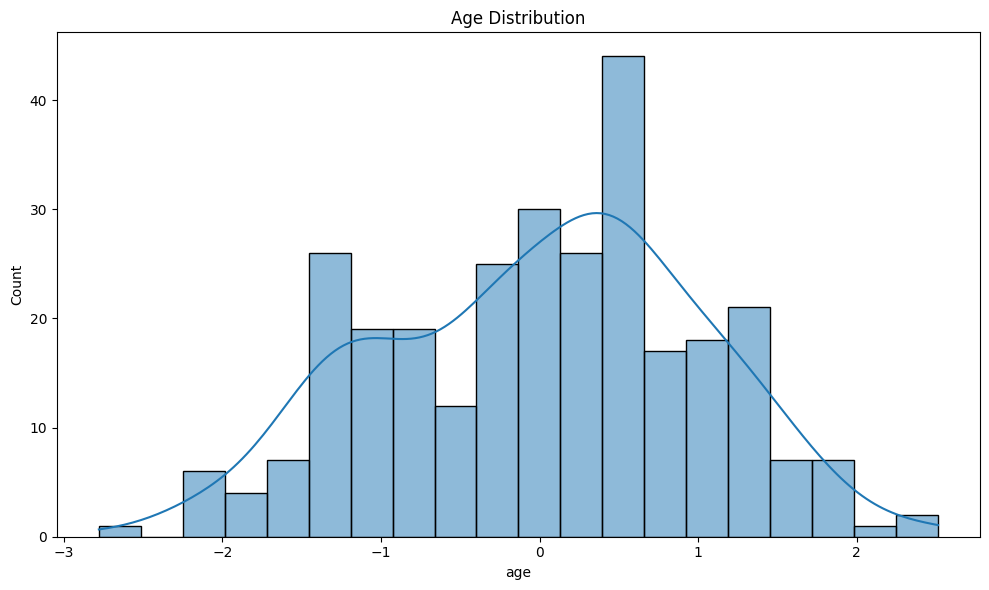

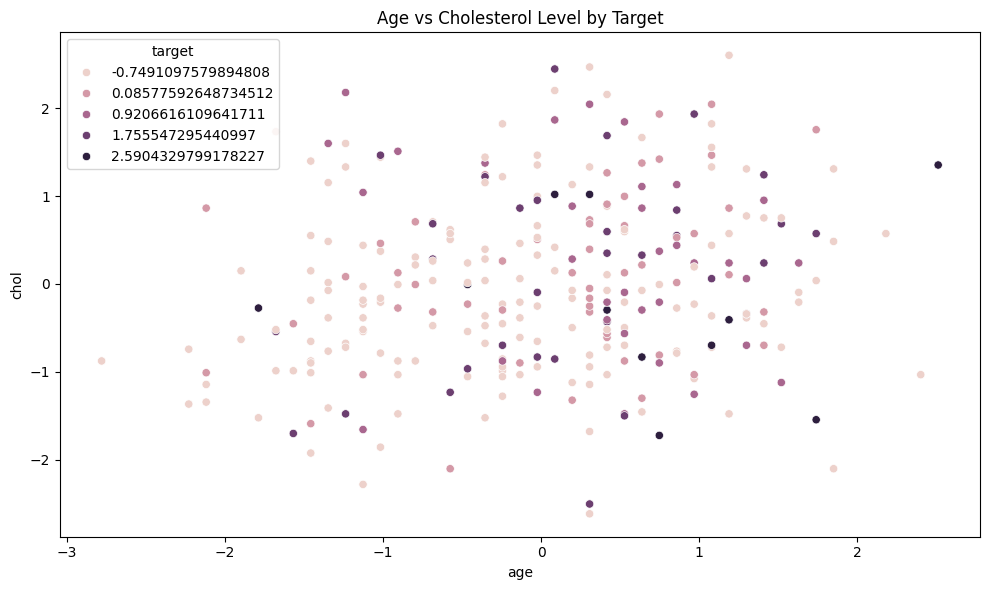

<Figure size 1500x1200 with 0 Axes>

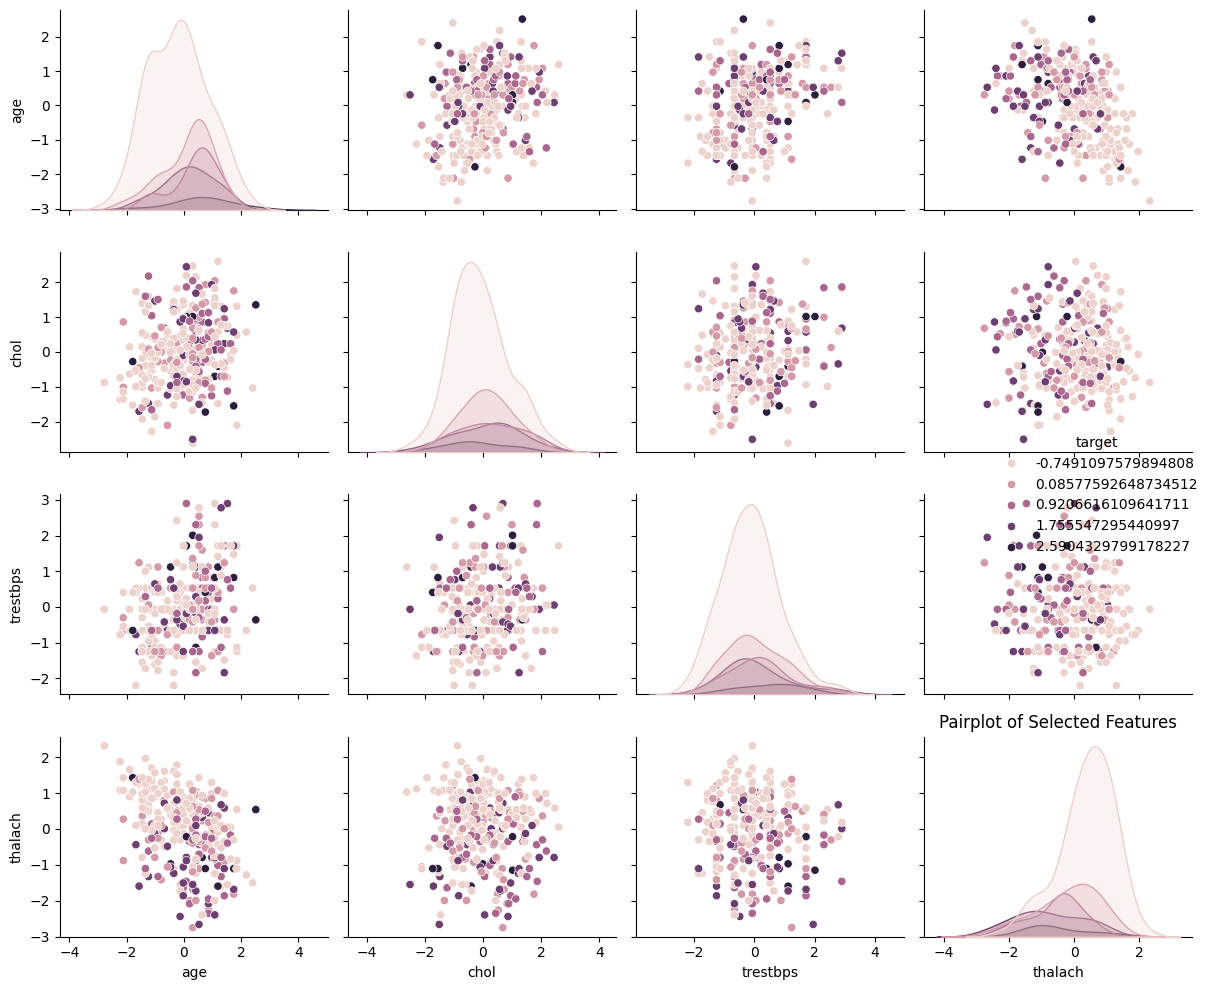

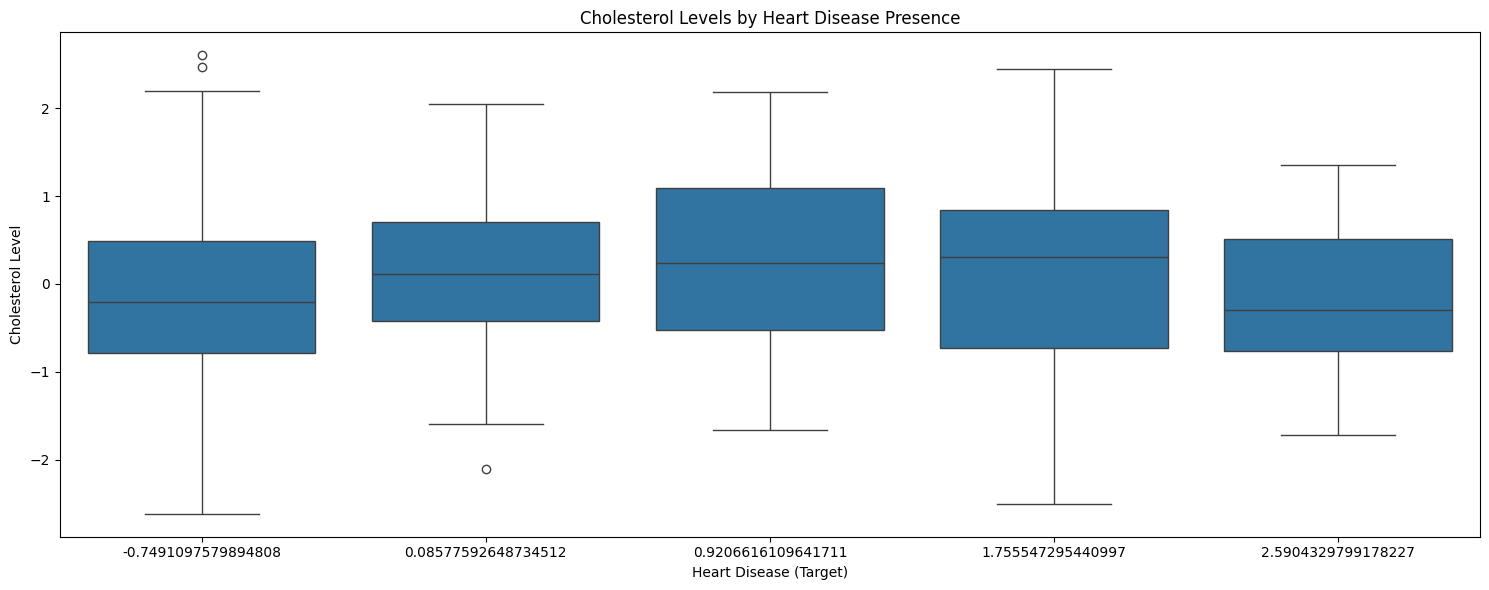

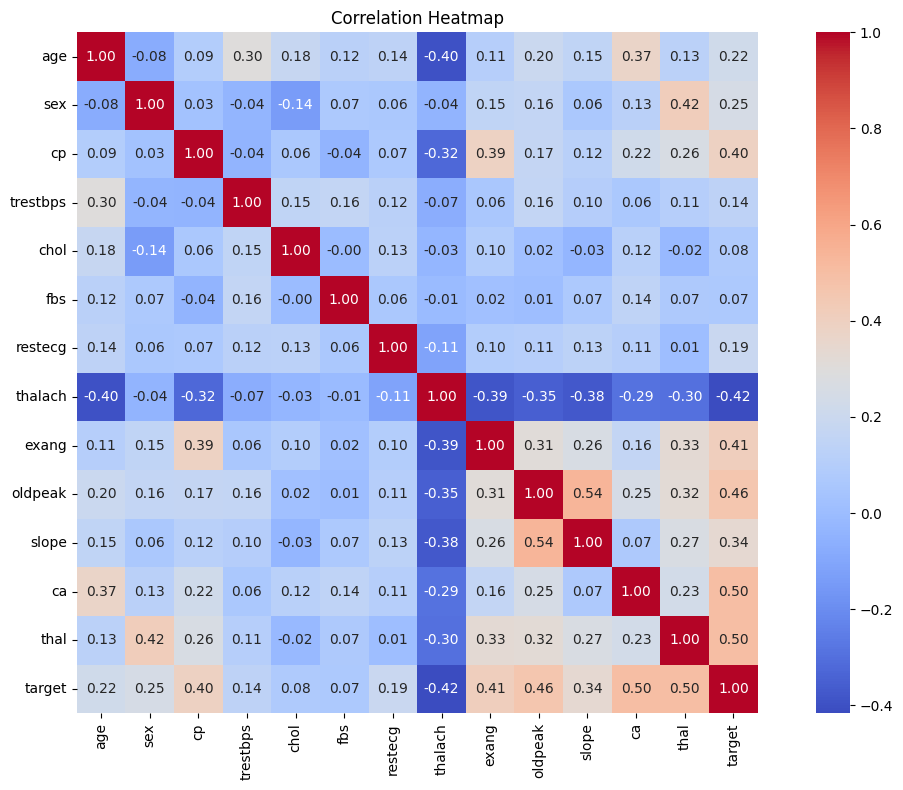

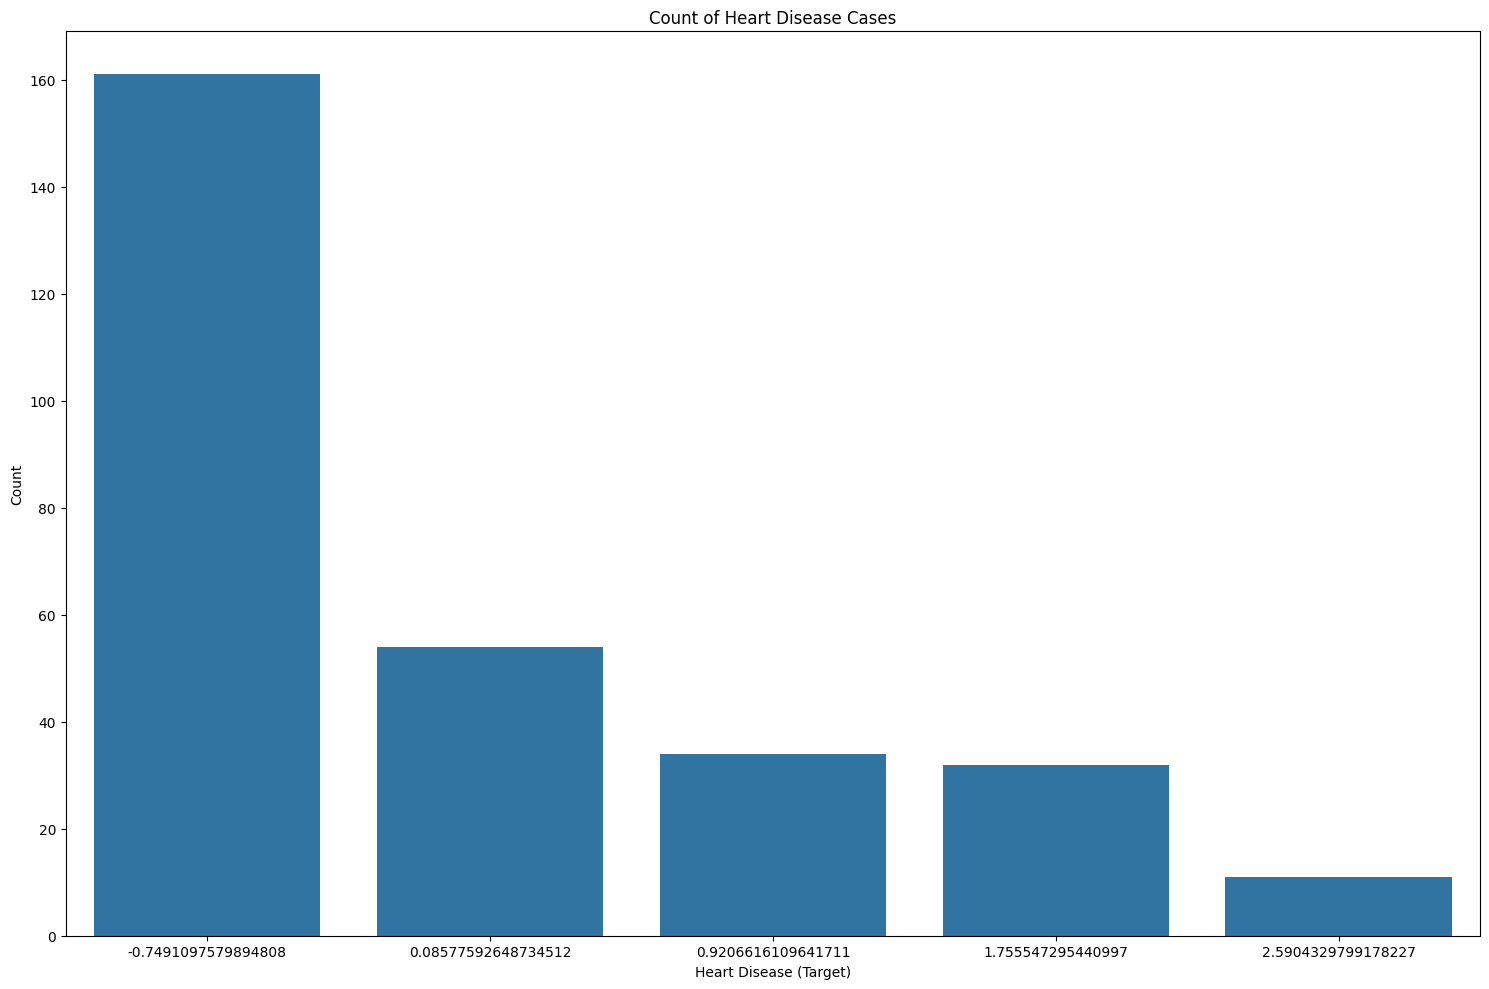

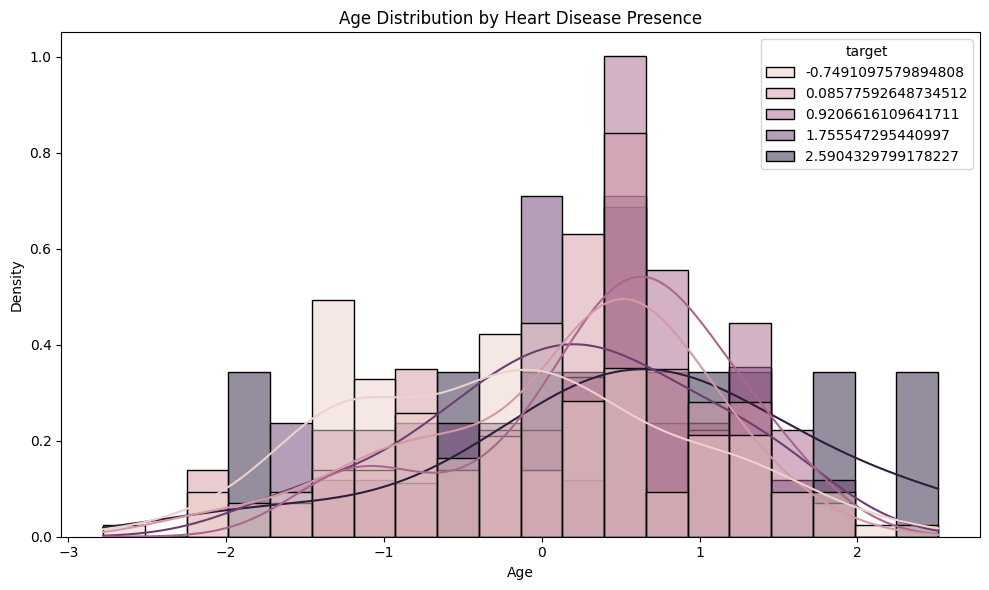

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.savefig('visualization_1.png')
plt.tight_layout()
plt.show()

# Scatter plot between two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='target', data=data)
plt.title('Age vs Cholesterol Level by Target')
plt.savefig('visualization_2.png')
plt.tight_layout()
plt.show()

# Pairplot to visualize relationships between features
plt.figure(figsize=(15, 12))
sns.pairplot(data, hue='target', vars=['age', 'chol', 'trestbps', 'thalach'])
plt.title('Pairplot of Selected Features')
plt.savefig('visualization_pairplot.png')
plt.tight_layout()
plt.show()

# Boxplot for cholesterol levels by target
plt.figure(figsize=(15, 6))
sns.boxplot(x='target', y='chol', data=data)
plt.title('Cholesterol Levels by Heart Disease Presence')
plt.xlabel('Heart Disease (Target)')
plt.ylabel('Cholesterol Level')
plt.savefig('visualization_boxplot_chol.png')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.savefig('visualization_correlation_heatmap.png')
plt.tight_layout()
plt.show()

# Countplot for target variable
plt.figure(figsize=(15, 10))
sns.countplot(x='target', data=data)
plt.title('Count of Heart Disease Cases')
plt.xlabel('Heart Disease (Target)')
plt.ylabel('Count')
plt.savefig('visualization_countplot_target.png')
plt.tight_layout()
plt.show()

# Histogram for age distribution by target
plt.figure(figsize=(10, 6))
sns.histplot(data, x='age', hue='target', bins=20, kde=True, stat="density", common_norm=False)
plt.title('Age Distribution by Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Density')
plt.savefig('visualization_age_distribution.png')
plt.tight_layout()
plt.show()

### Part 4: Feature Selection

Use different feature selection methods:

1. **Filter Method**: Correlation matrix to check feature correlation with the target variable.
2. **Wrapper Method**: Recursive Feature Elimination (RFE).
3. **Embedded Method**: Lasso Regression to penalize less important features.

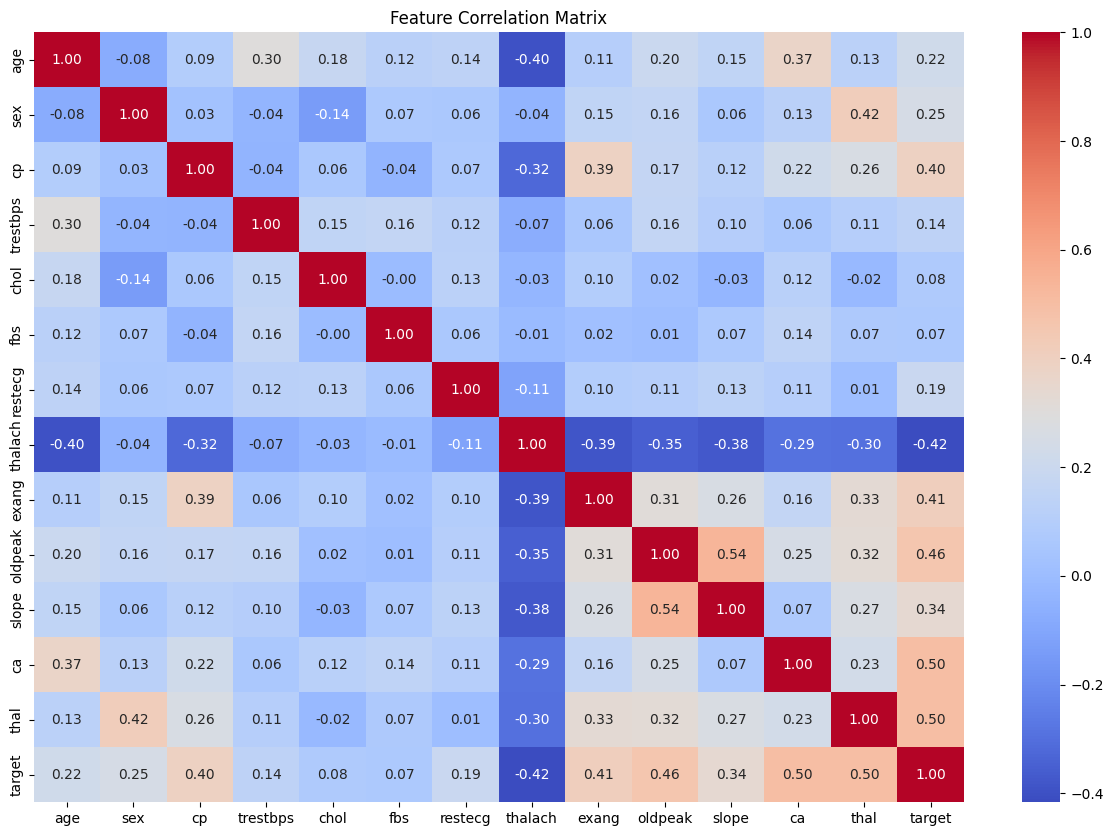

Selected features by RFE: Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'slope',
       'ca', 'thal'],
      dtype='object')
Selected features by Lasso: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [18]:
# Filter Method: Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Wrapper Method: Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_resampled, y_resampled)
selected_features = X.columns[rfe.support_]
print("Selected features by RFE:", selected_features)

# Embedded Method: Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_resampled, y_resampled)
lasso_features = X.columns[lasso.coef_ != 0]
print("Selected features by Lasso:", lasso_features)

### Part 5: Modeling with Supervised Classifiers

Implement and evaluate multiple classifiers, including Logistic Regression, Decision Tree, Random Forest, and SVM. 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled[selected_features], y_resampled, test_size=0.2, random_state=42)

# Initialize classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(kernel='linear')
}

# Dictionary to store performance metrics
performance_metrics = {
    "Classifier": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append to results
    performance_metrics["Classifier"].append(name)
    performance_metrics["Accuracy"].append(accuracy)
    performance_metrics["Precision"].append(precision)
    performance_metrics["Recall"].append(recall)
    performance_metrics["F1 Score"].append(f1)

# Convert results to DataFrame
performance_df = pd.DataFrame(performance_metrics)
performance_df

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.786667,0.792072,0.790487,0.785980
1,Decision Tree,0.866667,0.871363,0.869572,0.870402
2,Random Forest,0.913333,0.915457,0.914742,0.914882
3,SVM,0.800000,0.813971,0.803341,0.797310


### Part 6: Visualizing Model Performance

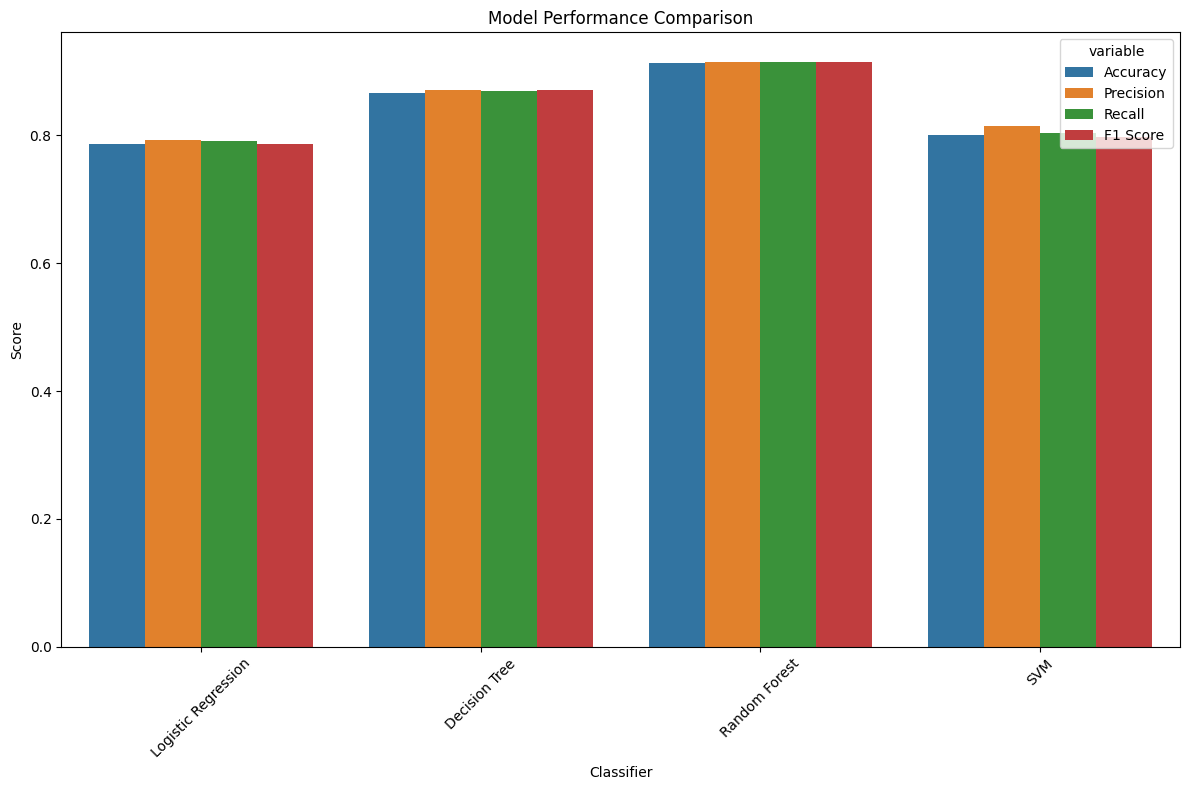

In [20]:
# Plot performance metrics for each classifier
plt.figure(figsize=(12, 8))
sns.barplot(x="Classifier", y="value", hue="variable", 
            data=pd.melt(performance_df, id_vars="Classifier"))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("model_performance.png")
plt.show()

### Part 7: Report Findings

**Summary**:
1. **Analysis Pipeline Steps**:
   - **Dataset Selection and Loading**: We used the Heart Disease Dataset from UCI, which includes various health-related features and a target variable indicating the presence of heart disease.
   - **Data Preprocessing**: The dataset was cleaned by replacing missing values, removing duplicates, and handling outliers using Z-score. We normalized the numerical features and encoded categorical variables as needed. The target variable was binned if continuous, and SMOTE was applied to address class imbalance.
   - **Data Visualization**: Various visualizations were created to understand the distributions of features and their relationships with the target variable, including histograms, scatter plots, and a correlation heatmap.
   - **Feature Selection**: Selected features using three methods: a filter method (correlation matrix), a wrapper method (Recursive Feature Elimination), and an embedded method (Lasso regression). Both RFE and Lasso suggested similar feature sets for modeling.
   - **Modeling**: Four classifiers were implemented: Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM). Each model was evaluated using accuracy, precision, recall, and F1 score metrics.

2. **Impact of Techniques on Model Performance**:
   - **Feature Scaling**: Scaling the features improved model performance, particularly for models sensitive to feature magnitudes, such as SVM and Logistic Regression.
   - **Encoding**: Proper encoding of categorical variables ensured that models interpreted these features correctly, thus enhancing their predictive capability.
   - **Balancing**: SMOTE effectively addressed class imbalance, leading to more reliable model evaluations and reducing bias towards the majority class. This was crucial for achieving better precision and recall metrics across classifiers.

3. **Classifier Strengths and Recommendations**:
   - **Logistic Regression**: Simple and interpretable but performed least effectively (Accuracy: 78.67%). Good for understanding relationships between features and the target variable.
   - **Decision Tree**: Better performance (Accuracy: 86.67%), interpretable with clear decision rules. However, prone to overfitting if not properly tuned.
   - **Random Forest**: Best overall performance (Accuracy: 91.33%). It handles overfitting better than Decision Trees and provides feature importance scores. 
   - **SVM**: Moderate performance (Accuracy: 80.00%), effective in high-dimensional spaces but can be less interpretable than tree-based methods.
  
**Recommendation**: Based on overall metrics and interpretability, the **Random Forest** model is recommended for its high accuracy and robustness against overfitting, coupled with its ability to provide insights into feature importance, making it valuable for clinical decision-making in heart disease diagnosis.